In [ ]:
!pip install pandas matplotlib

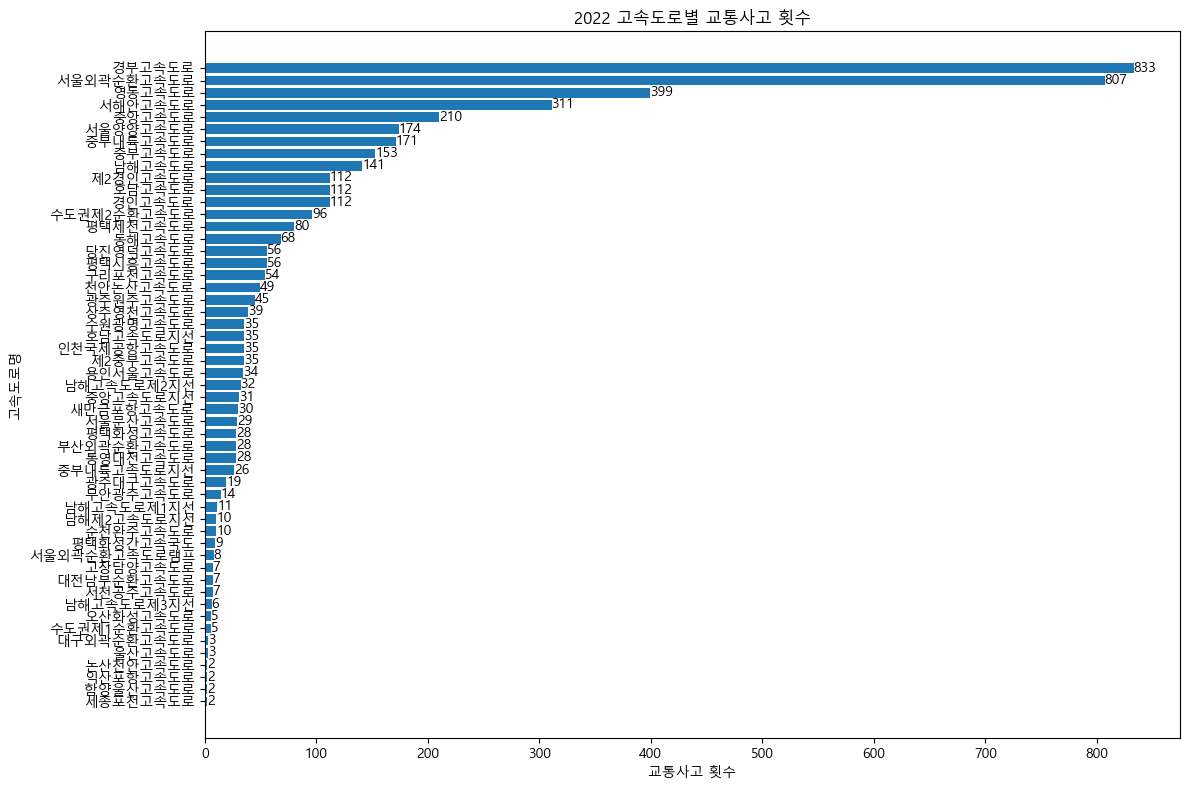

In [51]:
import os
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'


# 데이터 파일들이 있는 폴더 경로
folder_path = '../2022고속도로별 교통사고내역csv로 변환'

# 빈 딕셔너리 생성
accident_counts = {}

# 폴더 내의 파일 목록 얻기
files = os.listdir(folder_path)

# 각 파일에 대해 처리
for file in files:
    if file.endswith('.csv'):
        # 파일 경로
        file_path = os.path.join(folder_path, file)
        
        # 파일 읽기
        df = pd.read_csv(file_path, encoding='cp949')
        
        # 고속도로명 추출
        highway_name = file.split('2022')[1].split('.')[0]
        
        # 교통사고 횟수 계산
        accident_count = len(df)
        
        # 딕셔너리에 추가 또는 누적
        if highway_name in accident_counts:
            accident_counts[highway_name] += accident_count
        else:
            accident_counts[highway_name] = accident_count

# 딕셔너리를 데이터프레임으로 변환
data = pd.DataFrame(list(accident_counts.items()), columns=['고속도로명', '교통사고횟수'])

# 교통사고 횟수 기준으로 데이터프레임 정렬 (내림차순)
data = data.sort_values(by='교통사고횟수', ascending=True)  # ascending을 True로 변경하여 오름차순 정렬

# 히스토그램으로 시각화 (x축과 y축을 바꿔서)
plt.figure(figsize=(12, 8))
plt.barh(data['고속도로명'], data['교통사고횟수'])  # barh 함수 사용하여 가로 막대그래프 생성
plt.xlabel('교통사고 횟수')
plt.ylabel('고속도로명')
plt.title('2022 고속도로별 교통사고 횟수')
# 각 막대 위에 사고 횟수 표시
for index, value in enumerate(data['교통사고횟수']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)
plt.tight_layout()
plt.show()


In [52]:
#모든 사고내역 통합 -> 고속도로명 컬럼 추가

import os
import pandas as pd

# 데이터 파일들이 있는 폴더 경로
folder_path = '../2022고속도로별 교통사고내역csv로 변환'

# 빈 리스트 생성
data_frames = []

# 폴더 내의 파일 목록 얻기
files = os.listdir(folder_path)

# 각 파일에 대해 처리
for file in files:
    if file.endswith('.csv'):
        # 파일 경로
        file_path = os.path.join(folder_path, file)

        # 파일 읽기
        df = pd.read_csv(file_path, encoding='cp949')

        import pandas as pd

        # 파일 이름에서 고속도로명만 추출
        highway_name = file.split('2022')[1]
        
        #csv확장자 삭제
        highway_name = file.replace('csv', '')

        # 숫자 및 특수 문자 제거
        highway_name = ''.join(filter(str.isalpha, highway_name))

        # '고속도로명' 컬럼 추가
        df['고속도로명'] = highway_name

        # 데이터프레임을 리스트에 추가
        data_frames.append(df)

# 모든 데이터프레임을 하나로 합치기
merged_df = pd.concat(data_frames, ignore_index=True)

# 결과를 CSV 파일로 저장
output_path = '고속도로/combined_data_with_roadname.csv'
merged_df.to_csv(output_path, index=False, encoding='utf-8')

print(f'Merged data saved to {output_path}')


Merged data saved to 고속도로/combined_data_with_roadname.csv


In [53]:
# 고속도로명 동일하게 변환
import pandas as pd

# 데이터 읽기
file_path = '고속도로/combined_data_with_roadname.csv'
df = pd.read_csv(file_path)

# 고속도로명 수정 함수
def modify_highway_name(highway_name):
    return highway_name.replace('고속도로', '선')

# '고속도로명' 열의 값을 수정
df['고속도로명'] = df['고속도로명'].apply(modify_highway_name)

# 결과 확인
print(df.head())

# 수정된 데이터를 새로운 CSV 파일로 저장 (선택사항)
df.to_csv('고속도로/combined_data_with_roadname_modified.csv', index=False)


               사고번호             사고일시   요일               시군구  사고내용  사망자수  중상자수  \
0  2022010100100101  2022년 1월 1일 12시  토요일       경기도 안성시 원곡면  경상사고     0     0   
1  2022010200100013  2022년 1월 2일 02시  일요일  충청북도 청주시 서원구 남이면  경상사고     0     0   
2  2022010200100040  2022년 1월 2일 09시  일요일   경기도 용인시 기흥구 고매동  경상사고     0     0   
3  2022010200100083  2022년 1월 2일 12시  일요일      경상남도 양산시 상북면  경상사고     0     0   
4  2022010200100107  2022년 1월 2일 13시  일요일   경기도 용인시 수지구 동천동  경상사고     0     0   

   경상자수  부상신고자수        사고유형  ...      도로형태 가해운전자 차종 가해운전자 성별 가해운전자 연령  \
0     1       0    차대차 - 추돌  ...  단일로 - 기타       승용        여      20세   
1     1       0    차대차 - 추돌  ...  단일로 - 기타       승용        남      31세   
2     2       0    차대차 - 기타  ...  단일로 - 기타       화물        남      54세   
3     2       1    차대차 - 추돌  ...  단일로 - 기타       승용        남      25세   
4     8       0  차대차 - 측면충돌  ...  단일로 - 기타       승용        남      40세   

  가해운전자 상해정도 피해운전자 차종 피해운전자 성별 피해운전자 연령 피해운전자 상해정도 고속도로명  
0       상해없음   

C:\Users\na\AppData\Local\Temp\ipykernel_21752\4073126017.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  traffic_data_sorted = traffic_data[sorted_indices]


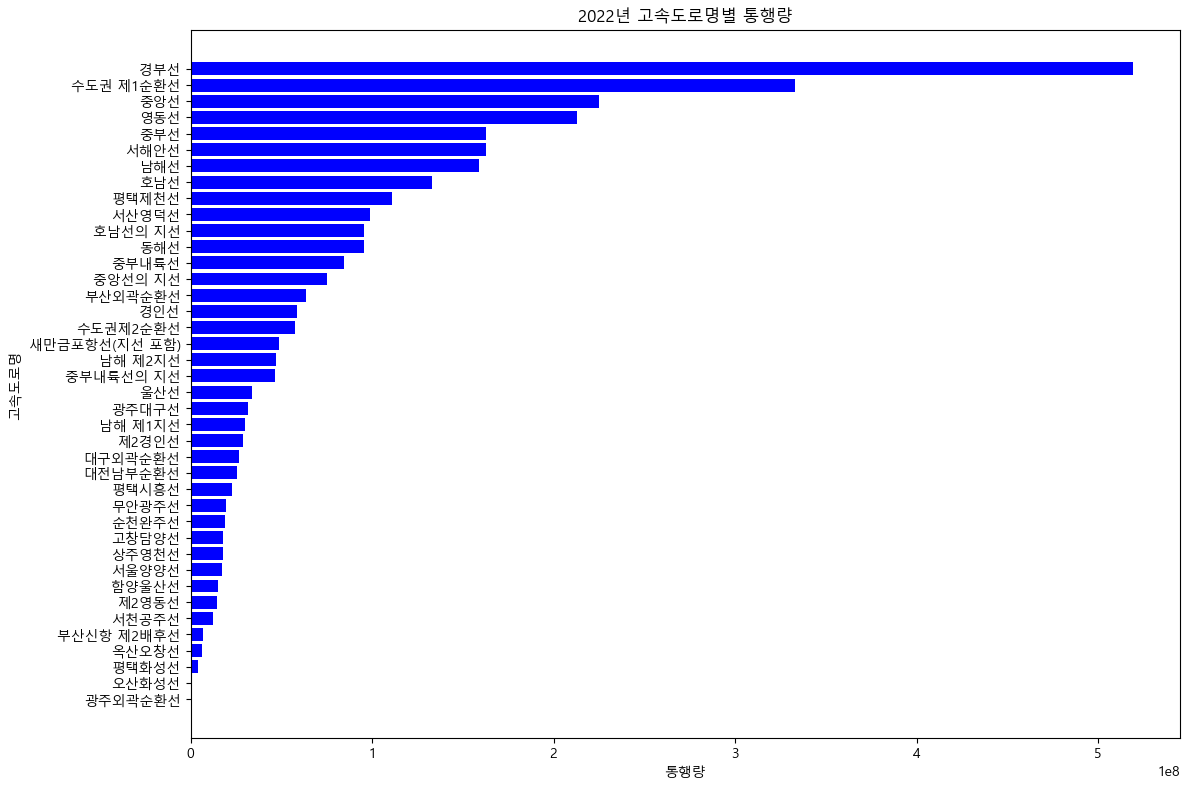

In [54]:
#고속도로별 통행량
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 읽기
file_path = '고속도로/고속도로별통행량(연간).csv'
df = pd.read_csv(file_path)

# '년'이 22인 데이터 필터링
df_2022 = df[df['년'] == 22]

# 고속도로명과 통행량 추출 (마지막 열 제외)
highways = df_2022.columns[1:-2]  # Exclude the last column
traffic_data = df_2022.iloc[0, 1:-2].str.replace(',', '').astype(float)

# 내림차순으로 정렬
sorted_indices = traffic_data.argsort()[::-1]
highways_sorted = [highways[i] for i in sorted_indices]
traffic_data_sorted = traffic_data[sorted_indices]

# 그래프 그리기
plt.figure(figsize=(12, 8))
bars = plt.barh(highways_sorted[::-1], traffic_data_sorted[::-1], color='blue')  # Reverse order for descending effect
plt.xlabel('통행량')
plt.ylabel('고속도로명')
plt.title('2022년 고속도로명별 통행량')  # Adjusted title for horizontal chart

plt.tight_layout()
plt.show()



In [55]:
import pandas as pd
import matplotlib.pyplot as plt


# 데이터 읽기
file_path = '고속도로/고속도로별통행량(연간).csv'
df = pd.read_csv(file_path)

# '년'이 22인 데이터 필터링
df_2022 = df[df['년'] == 22]

# 고속도로명과 통행량 추출 (마지막 열 제외)
highways = df_2022.columns[1:-2]  # Exclude the last column
traffic_data = df_2022.iloc[0, 1:-2].str.replace(',', '').astype(float)

# 내림차순으로 정렬
sorted_indices = traffic_data.argsort()[::-1]
highways_sorted = [highways[i] for i in sorted_indices]
traffic_data_sorted = traffic_data[sorted_indices]

# 데이터프레임 생성
result_df = pd.DataFrame({'고속도로명': highways_sorted, '통행량': traffic_data_sorted})

# 결과를 CSV 파일로 저장
result_df.to_csv('고속도로/고속도로명별통행량_22_modified.csv', index=False)


C:\Users\na\AppData\Local\Temp\ipykernel_21752\623884409.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  traffic_data_sorted = traffic_data[sorted_indices]


In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# 전체 고속도로 교통사고 데이터
accident_data = pd.read_csv('고속도로/combined_data_with_roadname_modified.csv')

# 고속도로별 교통량 데이터
traffic_data = pd.read_csv('고속도로/고속도로명별통행량_22_modified.csv')

# 고속도로명 변환
roadname_mapping = {
    '호남선의 지선': '호남선 지선',
    '호남선지선': '호남선 지선',
    '중앙선의 지선': '중앙선 지선',
    '중앙선 지선': '중앙선 지선',
    '제경인선': '제2경인선',
    '남해선제지선': '남해 제1지선',
    '남해제선지선': '남해 제2지선',
    '중앙선지선': '중앙선',
    '호남선의 지선': '호남선 지선',
    '새만금포항선(지선 포함)': '새만금포항선',
    '서울외곽순환선' : '수도권 제1순환선',
    '서울외곽순환선램프' : '수도권제2순환선',
    '수도권제순환선' : '수도권 제1순환선',
    '중부내륙선의 지선' : '중부내륙선지선',
    '제중부선' :  '중부내륙선지선',
    '제2영동선' : '광주원주선',
    '구리포천선' : '세종포천선',
    '천안논산선' : '논산천안선',
    '당진영덕선' : '서산영덕선',
    '평택화성간고속국도' : '평택화성선',
    '서울문산선' : '평택화성선',
    '용인서울선' : '오산화성선',
    '논산천안선' : '호남선',
    '익산포항선' : '새만금포항선',
    '통영대전선' : '중부선',
    '논산천안선' : '호남선',
    '중앙선 지선' : '중앙선'
}

accident_data['고속도로명'] = accident_data['고속도로명'].replace(roadname_mapping)
traffic_data['고속도로명'] = traffic_data['고속도로명'].replace(roadname_mapping)

# 고속도로별로 그룹화하여 사고횟수 파악
accident_counts = accident_data.groupby('고속도로명')['사고번호'].count().reset_index()
#print(accident_counts)

# Merge accident_counts with traffic_data to add the 통행량 column
accident_counts = pd.merge(accident_counts, traffic_data[['고속도로명', '통행량']], on='고속도로명', how='inner')

# Print the updated accident_counts DataFrame
print(accident_counts)

# 결과를 CSV 파일로 저장
accident_counts.to_csv('고속도로/고속도로별 통행량 및 사고건수.csv', index=False)



        고속도로명  사고번호          통행량
0         경인선   112   58456248.0
1       고창담양선     7   17948260.0
2       광주대구선    19   31503506.0
3       광주원주선    45   14727440.0
4     남해 제1지선    49   29988944.0
5     남해 제2지선    10   46959995.0
6         남해선   141  158903872.0
7     대구외곽순환선     3   26551995.0
8     대전남부순환선     7   25375368.0
9         동해선    68   95411852.0
10      무안광주선    14   19417173.0
11    부산외곽순환선    28   63696979.0
12      상주영천선    39   17753923.0
13     새만금포항선    32   48517118.0
14      서산영덕선    56   99046453.0
15      서울양양선   174   17431875.0
16      서천공주선     7   12366438.0
17       서해안선   311  162563879.0
18  수도권 제1순환선   908  333146464.0
19   수도권제2순환선     8   57793522.0
20      순천완주선    10   18813931.0
21        영동선   399  213179248.0
22      오산화성선    39     728093.0
23        울산선     3   34103908.0
24      제2경인선   112   28692485.0
25      중부내륙선   171   84459498.0
26    중부내륙선지선    61   46572069.0
27        중부선   181  162686535.0
28        중앙선   241  224887515.0
29      평택

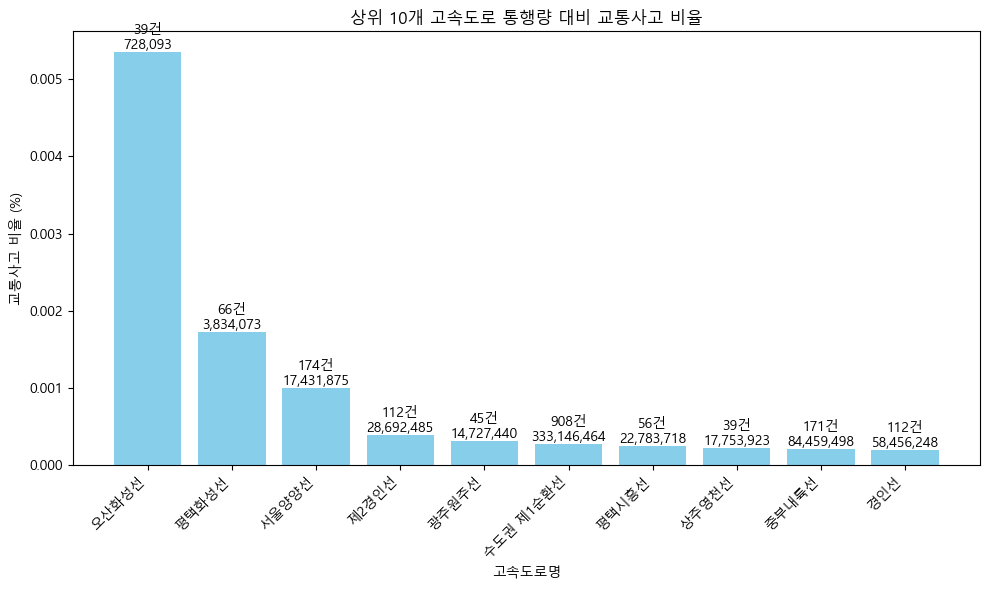

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

# Load the data
data = pd.read_csv('고속도로/고속도로별 통행량 및 사고건수.csv')

# Calculate accident ratio per traffic volume
data['사고비율'] = (data['사고번호'] / data['통행량']) * 100

# Sort the data in descending order based on '사고비율'
data = data.sort_values(by='사고비율', ascending=False)

# Select the top 10 highways
top_10_data = data.head(10)

# Plot the data for the top 10 highways
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_data['고속도로명'], top_10_data['사고비율'], color='skyblue')

# Add text annotations for accidents and traffic volume
for bar, accidents, traffic in zip(bars, top_10_data['사고번호'], top_10_data['통행량']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{accidents}건\n{traffic:,.0f}', ha='center', va='bottom', color='black')

plt.title('상위 10개 고속도로 통행량 대비 교통사고 비율')
plt.xlabel('고속도로명')
plt.ylabel('교통사고 비율 (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [61]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

#경부고속도로 월별 사고량
# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (Windows 기준)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 경로
file_path = '경부고속도로/경부고속도로전체_accidentInfoList.csv'

# CSV 파일 읽기 (encoding 지정)
df = pd.read_csv(file_path, delimiter=',', encoding='cp949')

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '월' 컬럼 추가
df['월'] = df['사고일시'].dt.month

# 월별 사고 수 계산
monthly_accidents = df.groupby('월').size()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
monthly_accidents.plot(kind='bar', color='skyblue')
plt.title('월별 사고 수')
plt.xlabel('월')
plt.ylabel('사고 수')
plt.xticks(rotation=0)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '경부고속도로/경부고속도로_전체_accidentInfoList.csv'

In [62]:

# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '시간대' 컬럼 추가
df['시간대'] = df['사고일시'].dt.hour

# 시간대별 사고량 계산
시간대별_사고수 = df['시간대'].value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
시간대별_사고수.plot(kind='bar', color='skyblue')
plt.title('시간대별 사고량')
plt.xlabel('시간대')
plt.ylabel('사고량')
plt.show()

KeyError: '사고일시'

In [63]:
# '사고일시' 컬럼을 datetime 형식으로 변환
df['사고일시'] = pd.to_datetime(df['사고일시'], format='%Y년 %m월 %d일 %H시')

# '요일' 컬럼을 기준으로 그룹화하여 사고 수 계산
요일별_사고수 = df['요일'].value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
요일별_사고수.plot(kind='bar', color='skyblue')
plt.title('요일별 사고량')
plt.xlabel('요일')
plt.ylabel('사고량')
plt.show()

KeyError: '사고일시'

In [64]:
# 법규위반별 사고 수 계산
법규위반별_사고수 = df['법규위반'].value_counts()

# 막대그래프 그리기
plt.figure(figsize=(12, 6))
법규위반별_사고수.plot(kind='bar', color='coral')
plt.title('법규위반별 사고량')
plt.xlabel('법규위반')
plt.ylabel('사고량')
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전
plt.show()



#안전운전 불이행 : 운전자가 지켜야하는 전반적인 안전 수칙을 어겼을 때를 통칭하는 사유.

KeyError: '법규위반'

In [65]:
# 사고유형별 사고 수 계산
사고유형별_사고수 = df['사고유형'].value_counts()

# 막대그래프 그리기
plt.figure(figsize=(12, 6))
사고유형별_사고수.plot(kind='bar', color='skyblue')
plt.title('사고유형별 사고량')
plt.xlabel('사고유형')
plt.ylabel('사고량')
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전
plt.show()

KeyError: '사고유형'

In [ ]:
#부상정도 구분

import pandas as pd
import matplotlib.pyplot as plt

# Load the data from yongin_kyungbu.csv
df = pd.read_csv('경부고속도로/yongin_kyungbu.csv')

# Group the data by '부상정도' and calculate the count of accidents for each category
grouped_data = df.groupby('사고내용').size().reset_index(name='사고수')

# Plot a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_data['사고내용'], grouped_data['사고수'], color='skyblue')

# Annotate each bar with its value
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, str(int(bar.get_height())), ha='center', va='bottom')

plt.title('부상정도에 따른 사고수')
plt.xlabel('부상정도')
plt.ylabel('사고수')
plt.show()



In [ ]:
#노면상태 구분

import pandas as pd
import matplotlib.pyplot as plt

# Load the data from yongin_kyungbu.csv
df = pd.read_csv('경부고속도로/yongin_kyungbu.csv')

# Group the data by '부상정도' and calculate the count of accidents for each category
grouped_data = df.groupby('노면상태').size().reset_index(name='사고수')

# Plot a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_data['노면상태'], grouped_data['사고수'], color='skyblue')

# Annotate each bar with its value
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, str(int(bar.get_height())), ha='center', va='bottom')

plt.title('노면상태에 따른 사고수')
plt.xlabel('노면상태')
plt.ylabel('사고수')
plt.show()

In [ ]:
#노면상태에 따른 부상정도 횟수
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from yongin_kyungbu.csv
df = pd.read_csv('경부고속도로/yongin_kyungbu.csv')

# Group the data by '노면상태' and '사고내용' and calculate the count of accidents for each category
grouped_data = df.groupby(['노면상태', '사고내용']).size().unstack().reset_index()

# Plot a bar graph
plt.figure(figsize=(12, 8))
ax = grouped_data.plot(kind='bar', x='노면상태', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('노면상태와 사고유형(사고수)')
plt.xlabel('노면상태')
plt.ylabel('사고수')
plt.legend(title='Accident Content', bbox_to_anchor=(1, 1))

# Annotate each stack with its value if the height is greater than 0
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='black')

plt.show()




In [ ]:
#노면상태에 따른 부상정도 분석
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from yongin_kyungbu.csv
df = pd.read_csv('경부고속도로/yongin_kyungbu.csv')

# Group the data by '노면상태' and '사고내용' and calculate the count of accidents for each category
grouped_data = df.groupby(['노면상태', '사고내용']).size().unstack().reset_index()

# Calculate the percentage of accidents for each category
grouped_data_percentage = grouped_data.set_index('노면상태').div(grouped_data.set_index('노면상태').sum(axis=1), axis=0) * 100

# Plot a stacked bar graph with percentages
plt.figure(figsize=(12, 8))
grouped_data_percentage.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('노면상태와 사고유형(Percentage)')
plt.xlabel('노면상태')
plt.ylabel('Percentage')
plt.legend(title='Accident Content', bbox_to_anchor=(1, 1))
plt.show()




In [ ]:
# 부상정도에 따른 기상상태 분석
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('경부고속도로/yongin_kyungbu.csv')

# '가해운전자 상해정도'와 '기상상태'로 데이터 그룹화하고 각 카테고리의 사고 횟수 계산
grouped_data = df.groupby(['가해운전자 상해정도', '기상상태']).size().unstack().reset_index()

# 각 카테고리별 사고 비율 계산
grouped_data_percentage = grouped_data.set_index('가해운전자 상해정도').div(grouped_data.set_index('가해운전자 상해정도').sum(axis=1), axis=0) * 100

# 비율을 표시한 쌓인 막대 그래프
plt.figure(figsize=(12, 8))
ax = grouped_data_percentage.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('부상정도와 기상상태의 연관관계')
plt.xlabel('부상정도')
plt.ylabel('Percentage')
plt.legend(title='Weather Condition', bbox_to_anchor=(1, 1))

# 각 쌓인 부분에 비율과 횟수를 주석으로 추가
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    percentage = f'{height:.1f}%'
    
    # 수정된 부분: grouped_data_percentage를 사용하여 횟수를 가져옴
    count = f'{grouped_data_percentage.loc[grouped_data_percentage.index[p.get_x()], grouped_data_percentage.columns[p.get_x()]]}'
    
    ax.annotate(f'{percentage}\n{count}', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='black')

plt.show()





In [ ]:
#가해자 차종과 부상정도의 연관관계
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 로드
df = pd.read_csv('경부고속도로/yongin_kyungbu.csv')

# '가해운전자 차종', '피해운전자 차종', '가해운전자 상해정도', '피해운전자 상해정도' 선택
selected_columns = ['가해운전자 차종', '피해운전자 차종', '가해운전자 상해정도', '피해운전자 상해정도']
subset_df = df[selected_columns].dropna()

# 퍼센티지 계산 함수 정의
def calculate_percentage(dataframe, groupby_columns):
    grouped_data = dataframe.groupby(groupby_columns).size().unstack()
    percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100
    return percentage_data

# 가해운전자 차종과 가해운전자 상해정도에 대한 퍼센티지 그래프
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
percentage_data1 = calculate_percentage(subset_df, ['가해운전자 차종', '가해운전자 상해정도'])
percentage_data1.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('가해운전자 차종과 상해정도')

# 피해운전자 차종과 피해운전자 상해정도에 대한 퍼센티지 그래프
plt.subplot(1, 2, 2)
percentage_data2 = calculate_percentage(subset_df, ['피해운전자 차종', '피해운전자 상해정도'])
percentage_data2.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('피해운전자 차종과 상해정도')

plt.tight_layout()
plt.show()






In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#가해자 차종과 피해자 부상정도의 연관관계

plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 로드
df = pd.read_csv('경부고속도로/yongin_kyungbu.csv')

# '가해운전자 차종', '피해운전자 상해정도' 선택
selected_columns = ['가해운전자 차종', '피해운전자 상해정도']
subset_df = df[selected_columns].dropna()

# 퍼센티지 계산 함수 정의
def calculate_percentage(dataframe, groupby_columns):
    grouped_data = dataframe.groupby(groupby_columns).size().unstack()
    percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100
    return percentage_data

# 가해운전자 차종과 피해운전자 상해정도에 대한 퍼센티지 그래프
plt.figure(figsize=(12, 8))
percentage_data = calculate_percentage(subset_df, ['가해운전자 차종', '피해운전자 상해정도'])
percentage_data.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('가해운전자 차종과 피해운전자 상해정도의 연관관계')
plt.xlabel('가해운전자 차종')
plt.ylabel('Percentage')
plt.legend(title='피해운전자 상해정도', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


In [ ]:
# '시군구' 컬럼에서 첫번째 영역 추출하여 새로운 컬럼 생성
df['지역'] = df['시군구'].apply(lambda x: x.split()[0])

# '지역' 컬럼을 기준으로 그룹화하여 사고 수 계산
지역별_사고수 = df['지역'].value_counts().sort_index()

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
지역별_사고수.plot(kind='bar', color='lightcoral')
plt.title('지역별 사고량')
plt.xlabel('지역')
plt.ylabel('사고량')
plt.show()

In [ ]:
#경기도를 면읍동으로 나눠 사고량 조사

gyeonggi_data = df[df['지역'] == '경기도']

# Extract subunits from the '시군구' column
gyeonggi_data['면읍동'] = gyeonggi_data['시군구'].apply(lambda x: x.split()[1])

# Group by subunits and calculate accident counts
subunit_accident_counts = gyeonggi_data['면읍동'].value_counts().sort_values(ascending=False)

# 막대그래프 그리기
plt.figure(figsize=(12, 8))
subunit_accident_counts.plot(kind='bar', color='lightcoral')
plt.title('경기도 면읍동별 사고량')
plt.xlabel('면읍동')
plt.ylabel('사고량')
plt.show()


In [ ]:
#1. 용인시 고속국도 사고 데이터 크롤링
#2. 사고번호를 이용해 이 중 경부고속도로만 추출 ->146건

import pandas as pd

# Load the merged result CSV file
merged_result_df = pd.read_csv('TAAS/yongin_merged_result.csv')

# Load the accidentInfoList CSV file
accident_info_df = pd.read_csv('경부고속도로/경부고속도로전체_accidentInfoList.csv')

# Extract the common '사고번호' values
common_accident_numbers = set(merged_result_df['사고번호']).intersection(accident_info_df['사고번호'])

# Filter the data based on common '사고번호'
result_df = merged_result_df[merged_result_df['사고번호'].isin(common_accident_numbers)]

# Save the result to a new CSV file
result_df.to_csv('경부고속도로/yongin_kyungbu.csv', index=False)


In [ ]:
import pandas as pd
import folium
from IPython.display import IFrame

# Load the data from yongin_kyungbu.csv
df = pd.read_csv('경부고속도로/yongin_kyungbu.csv')

# Create a folium map centered around the average latitude and longitude
map_center = [df['lat(위도)'].mean(), df['lon(경도)'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Add markers for each accident location
for index, row in df.iterrows():
    folium.Marker([row['lat(위도)'], row['lon(경도)']],
                  popup=f"사고번호: {row['사고번호']}, 사고내용: {row['사고내용']}",
                  icon=folium.Icon(color='red')).add_to(mymap)

# Save the map as an HTML file
html_file_path = '분석결과/yongin_kyungbu_map.html'
mymap.save(html_file_path)

mymap



In [ ]:
#고속도로IC정보.JSON -> CSV변환
import json
import pandas as pd

# JSON 파일 읽기
json_file_path = '경부고속도로/고속도로IC정보.JSON'

with open(json_file_path, 'r', encoding='utf-8') as json_file:
    ic_info_json = json.load(json_file)

# JSON 데이터를 DataFrame으로 변환
ic_df = pd.DataFrame(ic_info_json['list'])

# CSV 파일로 저장
csv_file_path = '경부고속도로/ic_info.csv'
ic_df.to_csv(csv_file_path, index=False, encoding='utf-8')

print(f'CSV 파일이 성공적으로 생성되었습니다. 경로: {csv_file_path}')



In [ ]:
#경부고속도로만 추출

# CSV 파일 읽기
csv_file_path = '경부고속도로/ic_info.csv'
ic_df = pd.read_csv(csv_file_path)

# "routeName"이 "경부선"인 데이터 추출
kyungbu_ic_df = ic_df[ic_df['routeName'] == '경부선']

# 새로운 CSV 파일로 저장
kyungbu_csv_file_path = '경부고속도로/ic_kyungbu_info.csv'
kyungbu_ic_df.to_csv(kyungbu_csv_file_path, index=False, encoding='utf-8')

print(f'CSV 파일이 성공적으로 생성되었습니다. 경로: {kyungbu_csv_file_path}')


In [ ]:
#위도 경도를 상세주소로 변환
import pandas as pd
from geopy.geocoders import Nominatim

# 데이터 불러오기
file_path = '경부고속도로/ic_kyungbu_info.csv'
df = pd.read_csv(file_path)

# 상세주소를 얻는 함수
def get_address(latitude, longitude):
    geolocator = Nominatim(user_agent="geo_converter")
    location = geolocator.reverse((latitude, longitude), language='ko')
    return location.address if location else None

# 상세주소 컬럼 추가
df['상세주소'] = df.apply(lambda row: get_address(row['yValue'], row['xValue']), axis=1)

# 결과를 새로운 CSV 파일로 저장
output_file_path = '경부고속도로/ic_kyungbu_info_with_address.csv'
df.to_csv(output_file_path, index=False, encoding='utf-8-sig')

print(f'새로운 CSV 파일이 생성되었습니다: {output_file_path}')


In [ ]:
#용인시의 경부고속도로 ic 정보 추출
import pandas as pd

# 데이터 불러오기
file_path = '경부고속도로/ic_kyungbu_info_with_address.csv'
df = pd.read_csv(file_path)

# '상세주소' 컬럼에 "용인시"가 포함된 데이터 추출
filtered_df = df[df['상세주소'].str.contains("용인시")]

# 결과를 새로운 CSV 파일로 저장
output_file_path = '경부고속도로/ic_kyungbu_yongin_info_with_address.csv'
filtered_df.to_csv(output_file_path, index=False)

# 결과 출력
print(f"용인시에 해당하는 데이터를 {output_file_path}에 저장했습니다.")


In [ ]:
#지도에 용인시 경부고속도로 사고위치와 ic위치 같이 표기

import pandas as pd
import folium
from IPython.display import IFrame

# Load the accident data from yongin_kyungbu.csv
accident_df = pd.read_csv('경부고속도로/yongin_kyungbu.csv')

# Load the IC data with addresses from ic_kyungbu_yongin_info_with_address.csv
ic_df = pd.read_csv('경부고속도로/ic_kyungbu_yongin_info_with_address.csv')

# Create a folium map centered around the average latitude and longitude
map_center = [accident_df['lat(위도)'].mean(), accident_df['lon(경도)'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Add markers for each accident location (red)
for _, accident_row in accident_df.iterrows():
    folium.Marker([accident_row['lat(위도)'], accident_row['lon(경도)']],
                  popup=f"사고번호: {accident_row['사고번호']}, 사고내용: {accident_row['사고내용']}",
                  icon=folium.Icon(color='red')).add_to(mymap)

# Add markers for each IC location with different color (blue)
for _, ic_row in ic_df.iterrows():
    folium.Marker([ic_row['yValue'], ic_row['xValue']],
                  popup=f"IC명: {ic_row['icName']}",
                  icon=folium.Icon(color='blue')).add_to(mymap)

# Save the map as an HTML file
html_file_path = '분석결과/yongin_kyungbu_map_with_ic.html'
mymap.save(html_file_path)

mymap
